In [2]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: rhyswickens (shcau-university-of-calgary-in-alberta) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
# Get all runs from a specific project
api = wandb.Api()
runs = api.runs("shcau-university-of-calgary-in-alberta/transfer_learning_garbage")

print(runs)

<Runs shcau-university-of-calgary-in-alberta/transfer_learning_garbage>


# Experiment_Multimodal_Gated_Only

In [5]:
# Get data for specific runs
run_prefix_mm_gated = "experiment_multimodal_gated_only_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_mm_gated = [run for run in runs if run.name and run.name.startswith(run_prefix_mm_gated)]

print(cv_runs_mm_gated)

# Extract val_accuracy and val_loss for each run
metrics_mm_gated = []
for run in cv_runs_mm_gated:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_mm_gated.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_mm_gated)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_mm_gated = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()


[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/dmnq6asf (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/esns79rw (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/s7jlkm98 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/tah0fa5o (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/p8hfathk (finished)>]
Fetching data for: experiment_multimodal_gated_only_fold_1
Fetching data for: experiment_multimodal_gated_only_fold_2
Fetching data for: experiment_multimodal_gated_only_fold_3
Fetching data for: experiment_multimodal_gated_only_fold_4
Fetching data for: experiment_multimodal_gated_only_fold_5


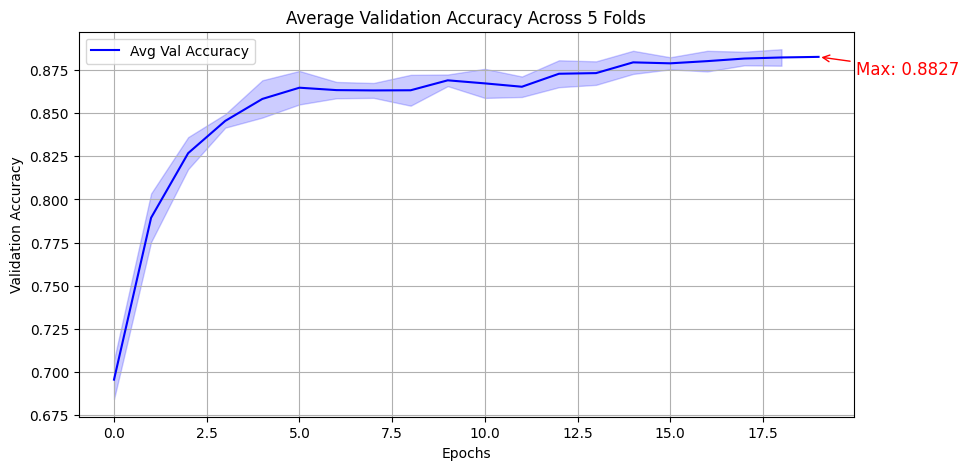

In [6]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_mm_gated = agg_metrics_mm_gated["val_accuracy_mean"].max()
max_epoch_mm_gated = agg_metrics_mm_gated["_step"][agg_metrics_mm_gated["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_gated["_step"], agg_metrics_mm_gated["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_gated["_step"], 
                 agg_metrics_mm_gated["val_accuracy_mean"] - agg_metrics_mm_gated["val_accuracy_std"], 
                 agg_metrics_mm_gated["val_accuracy_mean"] + agg_metrics_mm_gated["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_mm_gated:.4f}", 
             xy=(max_epoch_mm_gated, max_val_acc_mm_gated), 
             xytext=(max_epoch_mm_gated + 1, max_val_acc_mm_gated - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

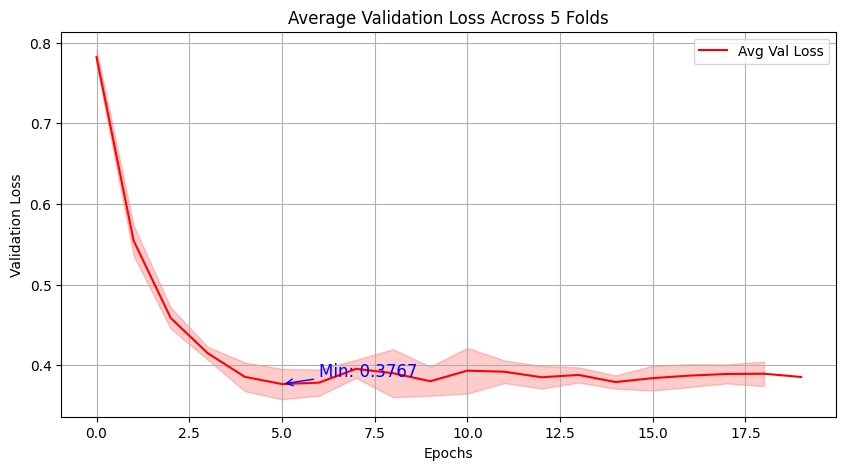

In [7]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_mm_gated = agg_metrics_mm_gated["val_loss_mean"].min()
min_epoch_mm_gated = agg_metrics_mm_gated["_step"][agg_metrics_mm_gated["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_gated["_step"], agg_metrics_mm_gated["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_gated["_step"], 
                 agg_metrics_mm_gated["val_loss_mean"] - agg_metrics_mm_gated["val_loss_std"], 
                 agg_metrics_mm_gated["val_loss_mean"] + agg_metrics_mm_gated["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_mm_gated:.4f}", 
             xy=(min_epoch_mm_gated, min_val_loss_mm_gated), 
             xytext=(min_epoch_mm_gated + 1, min_val_loss_mm_gated + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()


# Experiment_MultiModal_Attention_Only

In [8]:
# Get data for specific runs
run_prefix_mm_attention = "experiment_multimodal_attention_only_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_mm_attention = [run for run in runs if run.name and run.name.startswith(run_prefix_mm_attention)]

print(cv_runs_mm_attention)

# Extract val_accuracy and val_loss for each run
metrics_mm_attention = []
for run in cv_runs_mm_attention:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_mm_attention.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_mm_attention)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_mm_attention = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()

[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/9kq846ql (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/7sd1wx0s (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/wdvlzkot (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/yheii86i (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/55o9tjej (finished)>]
Fetching data for: experiment_multimodal_attention_only_fold_1
Fetching data for: experiment_multimodal_attention_only_fold_2
Fetching data for: experiment_multimodal_attention_only_fold_3
Fetching data for: experiment_multimodal_attention_only_fold_4
Fetching data for: experiment_multimodal_attention_only_fold_5


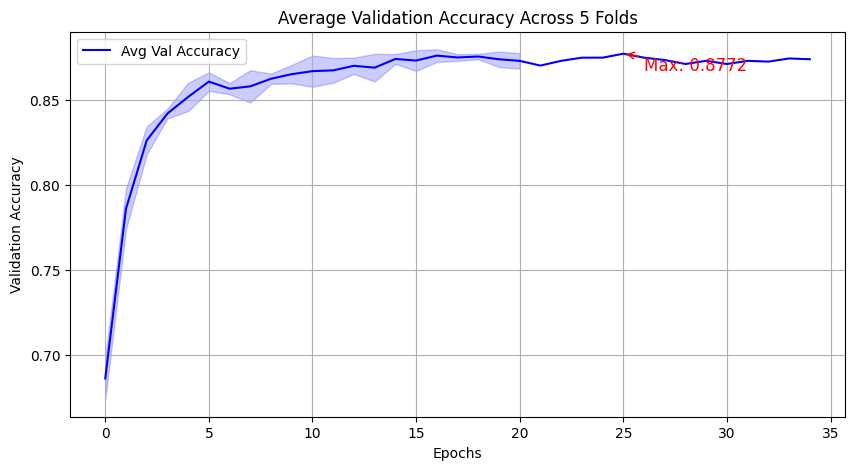

In [9]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_mm_attention = agg_metrics_mm_attention["val_accuracy_mean"].max()
max_epoch_mm_attention = agg_metrics_mm_attention["_step"][agg_metrics_mm_attention["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_attention["_step"], agg_metrics_mm_attention["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_attention["_step"], 
                 agg_metrics_mm_attention["val_accuracy_mean"] - agg_metrics_mm_attention["val_accuracy_std"], 
                 agg_metrics_mm_attention["val_accuracy_mean"] + agg_metrics_mm_attention["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_mm_attention:.4f}", 
             xy=(max_epoch_mm_attention, max_val_acc_mm_attention), 
             xytext=(max_epoch_mm_attention + 1, max_val_acc_mm_attention - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

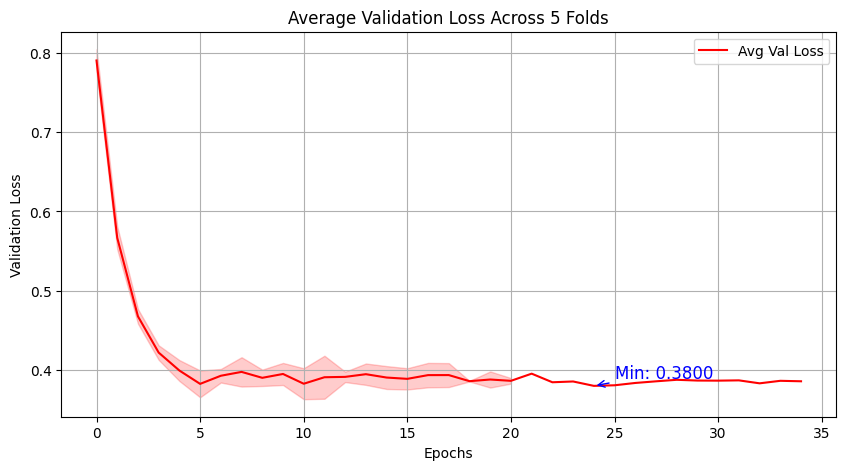

In [10]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_mm_attention = agg_metrics_mm_attention["val_loss_mean"].min()
min_epoch_mm_attention = agg_metrics_mm_attention["_step"][agg_metrics_mm_attention["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_attention["_step"], agg_metrics_mm_attention["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_attention["_step"], 
                 agg_metrics_mm_attention["val_loss_mean"] - agg_metrics_mm_attention["val_loss_std"], 
                 agg_metrics_mm_attention["val_loss_mean"] + agg_metrics_mm_attention["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_mm_attention:.4f}", 
             xy=(min_epoch_mm_attention, min_val_loss_mm_attention), 
             xytext=(min_epoch_mm_attention + 1, min_val_loss_mm_attention + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()


# Experiment_Multimodal_Attention_Gated_Fusion

In [11]:
# Get data for specific runs
run_prefix_mm_attention_gated = "experiment_multimodal_attention_gated_fusion_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_mm_attention_gated = [run for run in runs if run.name and run.name.startswith(run_prefix_mm_attention_gated)]

print(cv_runs_mm_attention_gated)

# Extract val_accuracy and val_loss for each run
metrics_mm_attention_gated = []
for run in cv_runs_mm_attention_gated:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_mm_attention_gated.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_mm_attention_gated)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_mm_attention_gated = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()

[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/wft1mavq (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/k0q01ebw (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/1710y05n (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/cuu7sjxc (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/nl640e8f (finished)>]
Fetching data for: experiment_multimodal_attention_gated_fusion_fold_1
Fetching data for: experiment_multimodal_attention_gated_fusion_fold_2
Fetching data for: experiment_multimodal_attention_gated_fusion_fold_3
Fetching data for: experiment_multimodal_attention_gated_fusion_fold_4
Fetching data for: experiment_multimodal_attention_gated_fusion_fold_5


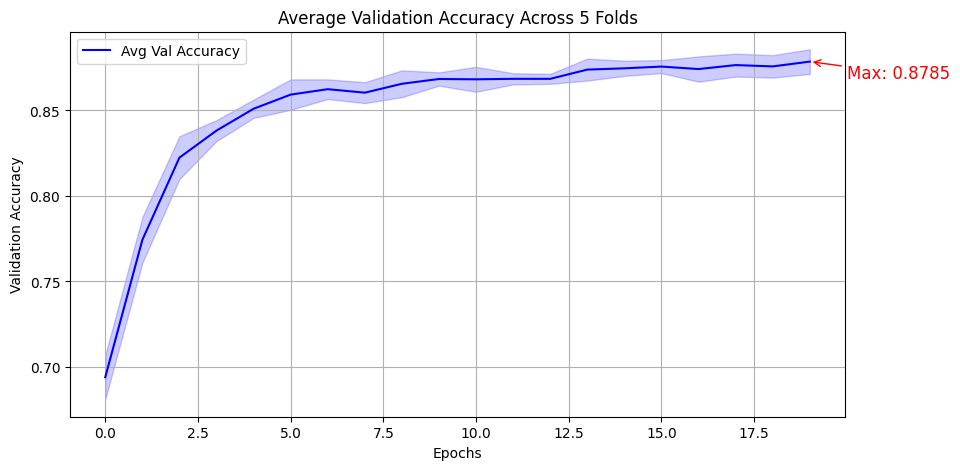

In [12]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_mm_attention_gated = agg_metrics_mm_attention_gated["val_accuracy_mean"].max()
max_epoch_mm_attention_gated = agg_metrics_mm_attention_gated["_step"][agg_metrics_mm_attention_gated["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_attention_gated["_step"], agg_metrics_mm_attention_gated["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_attention_gated["_step"], 
                 agg_metrics_mm_attention_gated["val_accuracy_mean"] - agg_metrics_mm_attention_gated["val_accuracy_std"], 
                 agg_metrics_mm_attention_gated["val_accuracy_mean"] + agg_metrics_mm_attention_gated["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_mm_attention_gated:.4f}", 
             xy=(max_epoch_mm_attention_gated, max_val_acc_mm_attention_gated), 
             xytext=(max_epoch_mm_attention_gated + 1, max_val_acc_mm_attention_gated - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

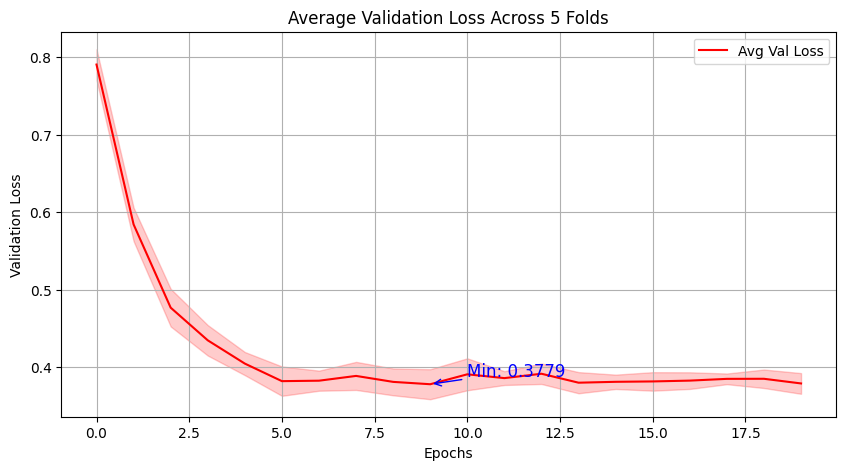

In [13]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_mm_attention_gated = agg_metrics_mm_attention_gated["val_loss_mean"].min()
min_epoch_mm_attention_gated = agg_metrics_mm_attention_gated["_step"][agg_metrics_mm_attention_gated["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_attention_gated["_step"], agg_metrics_mm_attention_gated["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_attention_gated["_step"], 
                 agg_metrics_mm_attention_gated["val_loss_mean"] - agg_metrics_mm_attention_gated["val_loss_std"], 
                 agg_metrics_mm_attention_gated["val_loss_mean"] + agg_metrics_mm_attention_gated["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_mm_attention_gated:.4f}", 
             xy=(min_epoch_mm_attention_gated, min_val_loss_mm_attention_gated), 
             xytext=(min_epoch_mm_attention_gated + 1, min_val_loss_mm_attention_gated + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()


# Experiment_Multimodal_Enetb0_224_Simple_Concat

In [14]:
# Get data for specific runs
run_prefix_mm_enet = "experiment_multimodal_enetb0_224_simple_concat_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_mm_enet = [run for run in runs if run.name and run.name.startswith(run_prefix_mm_enet)]

print(cv_runs_mm_enet)

# Extract val_accuracy and val_loss for each run
metrics_mm_enet = []
for run in cv_runs_mm_enet:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_mm_enet.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_mm_enet)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_mm_enet = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()

[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/l14f743j (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/qmbu8r12 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/wo7dja6z (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/hcm7qw26 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/c4rrl1vw (finished)>]
Fetching data for: experiment_multimodal_enetb0_224_simple_concat_fold_1
Fetching data for: experiment_multimodal_enetb0_224_simple_concat_fold_2
Fetching data for: experiment_multimodal_enetb0_224_simple_concat_fold_3
Fetching data for: experiment_multimodal_enetb0_224_simple_concat_fold_4
Fetching data for: experiment_multimodal_enetb0_224_simple_concat_fold_5


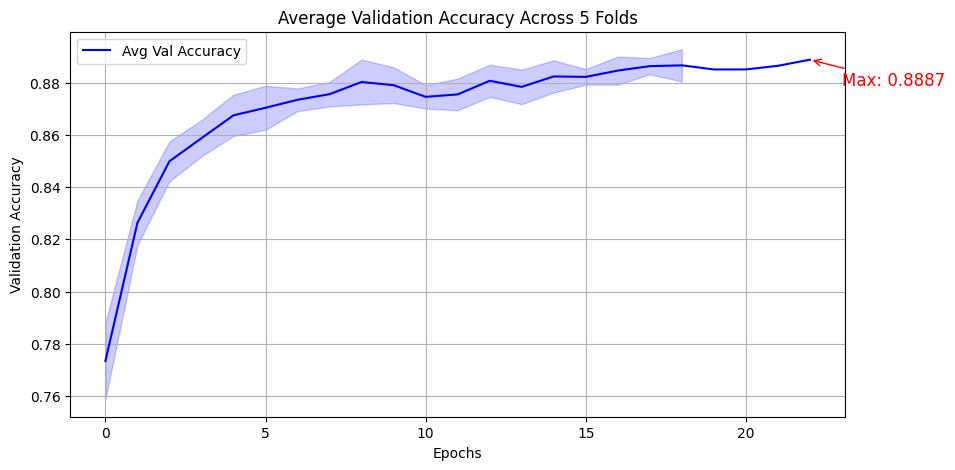

In [15]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_mm_enet = agg_metrics_mm_enet["val_accuracy_mean"].max()
max_epoch_mm_enet = agg_metrics_mm_enet["_step"][agg_metrics_mm_enet["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_enet["_step"], agg_metrics_mm_enet["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_enet["_step"], 
                 agg_metrics_mm_enet["val_accuracy_mean"] - agg_metrics_mm_enet["val_accuracy_std"], 
                 agg_metrics_mm_enet["val_accuracy_mean"] + agg_metrics_mm_enet["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_mm_enet:.4f}", 
             xy=(max_epoch_mm_enet, max_val_acc_mm_enet), 
             xytext=(max_epoch_mm_enet + 1, max_val_acc_mm_enet - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

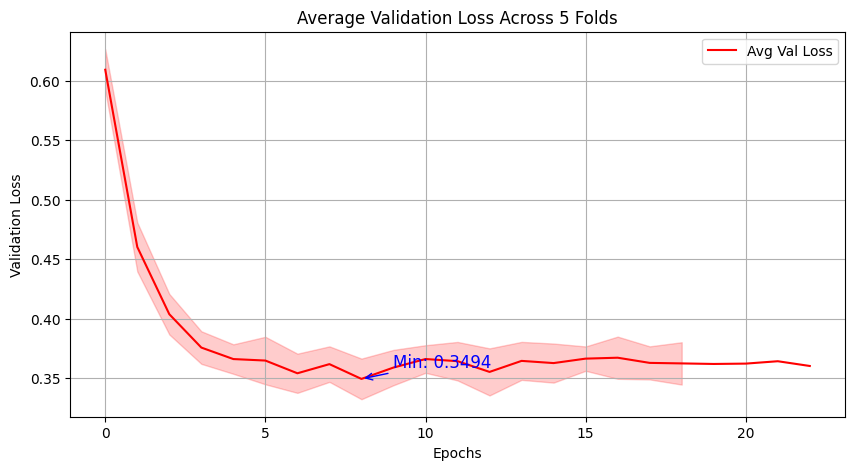

In [16]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_mm_enet = agg_metrics_mm_enet["val_loss_mean"].min()
min_epoch_mm_enet = agg_metrics_mm_enet["_step"][agg_metrics_mm_enet["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_enet["_step"], agg_metrics_mm_enet["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_enet["_step"], 
                 agg_metrics_mm_enet["val_loss_mean"] - agg_metrics_mm_enet["val_loss_std"], 
                 agg_metrics_mm_enet["val_loss_mean"] + agg_metrics_mm_enet["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_mm_enet:.4f}", 
             xy=(min_epoch_mm_enet, min_val_loss_mm_enet), 
             xytext=(min_epoch_mm_enet + 1, min_val_loss_mm_enet + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

# Experiment_Multimodal_Transformer_Fusion

In [17]:
# Get data for specific runs
run_prefix_mm_transformer = "experiment_multimodal_transformer_fusion_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_mm_transformer = [run for run in runs if run.name and run.name.startswith(run_prefix_mm_transformer)]

print(cv_runs_mm_transformer)

# Extract val_accuracy and val_loss for each run
metrics_mm_transformer = []
for run in cv_runs_mm_transformer:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_mm_transformer.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_mm_transformer)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_mm_transformer = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()

[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/pycghor3 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/ew7pjung (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/ffettvts (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/zomhsau8 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/ypxz0dc8 (finished)>]
Fetching data for: experiment_multimodal_transformer_fusion_fold_1
Fetching data for: experiment_multimodal_transformer_fusion_fold_2
Fetching data for: experiment_multimodal_transformer_fusion_fold_3
Fetching data for: experiment_multimodal_transformer_fusion_fold_4
Fetching data for: experiment_multimodal_transformer_fusion_fold_5


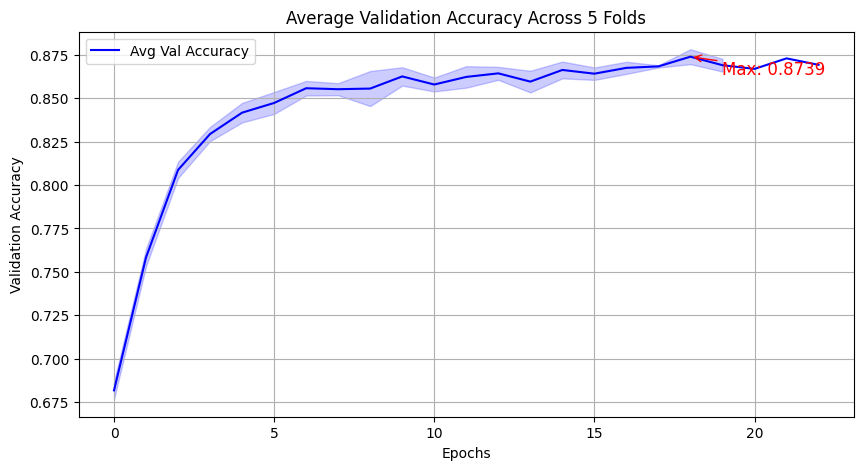

In [18]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_mm_transformer = agg_metrics_mm_transformer["val_accuracy_mean"].max()
max_epoch_mm_transformer = agg_metrics_mm_transformer["_step"][agg_metrics_mm_transformer["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_transformer["_step"], agg_metrics_mm_transformer["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_transformer["_step"], 
                 agg_metrics_mm_transformer["val_accuracy_mean"] - agg_metrics_mm_transformer["val_accuracy_std"], 
                 agg_metrics_mm_transformer["val_accuracy_mean"] + agg_metrics_mm_transformer["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_mm_transformer:.4f}", 
             xy=(max_epoch_mm_transformer, max_val_acc_mm_transformer), 
             xytext=(max_epoch_mm_transformer + 1, max_val_acc_mm_transformer - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

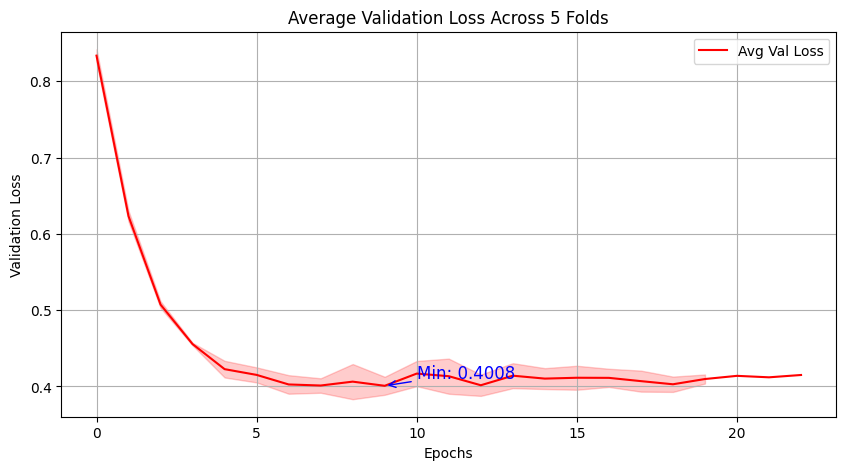

In [19]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_mm_transformer = agg_metrics_mm_transformer["val_loss_mean"].min()
min_epoch_mm_transformer = agg_metrics_mm_transformer["_step"][agg_metrics_mm_transformer["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_transformer["_step"], agg_metrics_mm_transformer["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_transformer["_step"], 
                 agg_metrics_mm_transformer["val_loss_mean"] - agg_metrics_mm_transformer["val_loss_std"], 
                 agg_metrics_mm_transformer["val_loss_mean"] + agg_metrics_mm_transformer["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_mm_transformer:.4f}", 
             xy=(min_epoch_mm_transformer, min_val_loss_mm_transformer), 
             xytext=(min_epoch_mm_transformer + 1, min_val_loss_mm_transformer + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

# Combined Graphs

In [20]:
# Collect all models aggregated metrics
all_models_metrics = {
    "Gated Fusion": agg_metrics_mm_gated,
    "Attention Fusion": agg_metrics_mm_attention,
    "Hybrid Gated-Attention": agg_metrics_mm_attention_gated,
    "Simple Concatenation": agg_metrics_mm_enet,
    "Transformer-based Fusion": agg_metrics_mm_transformer
}

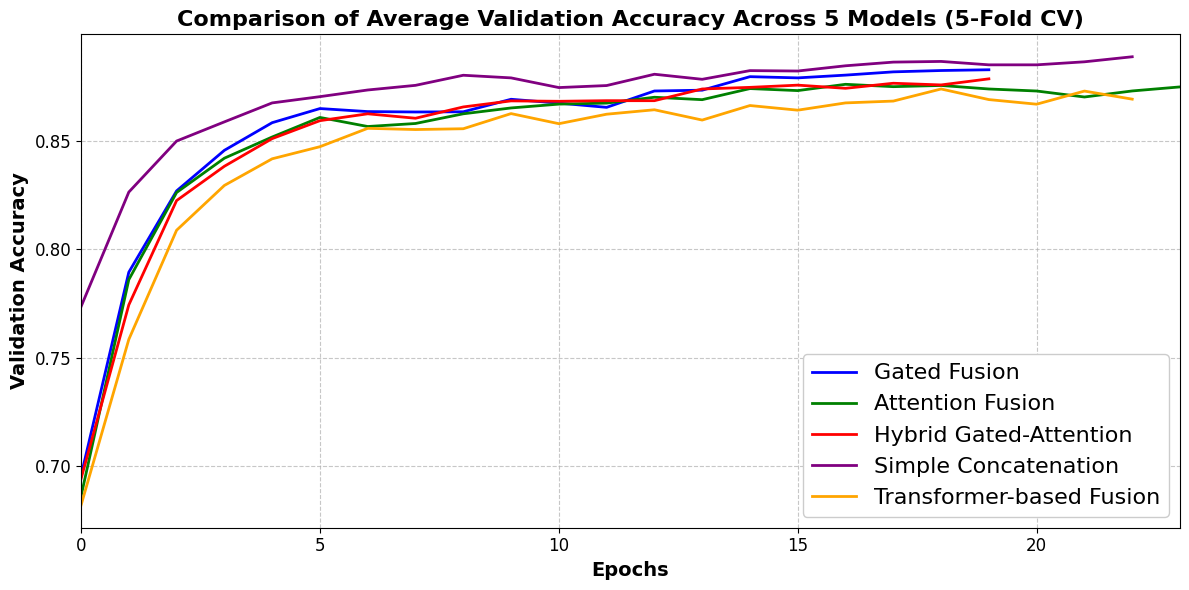

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, (model_name, metrics) in enumerate(all_models_metrics.items()):
    plt.plot(metrics["_step"], metrics["val_accuracy_mean"], 
             label=f"{model_name}", 
             color=colors[i],
             linewidth=2)

plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Validation Accuracy", fontsize=14, fontweight='bold')
plt.title("Comparison of Average Validation Accuracy Across 5 Models (5-Fold CV)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.legend(loc='lower right', fontsize=16, framealpha=1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 23)  # Limit epochs to 23
plt.tight_layout()
plt.show()

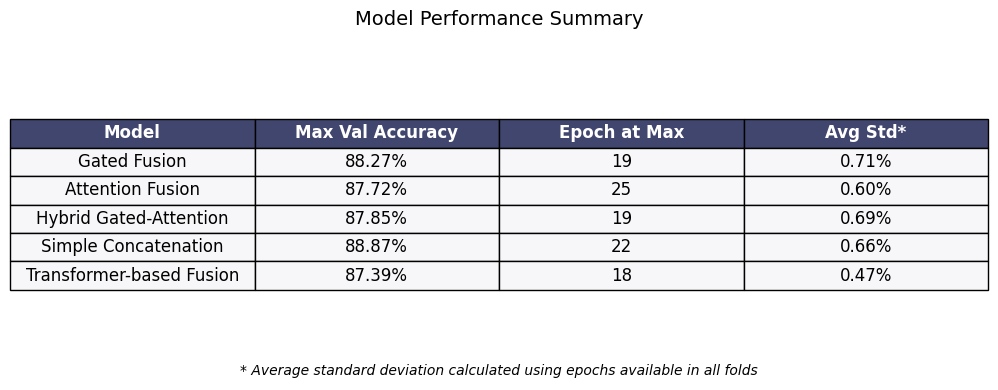

In [46]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Create the results DataFrame with modified columns
results = []
for model_name, metrics in all_models_metrics.items():
    valid_epochs = metrics.dropna(subset=['val_accuracy_std'])
    last_valid_epoch = valid_epochs['_step'].max()
    max_row = metrics.loc[metrics['val_accuracy_mean'].idxmax()]
    avg_std = valid_epochs['val_accuracy_std'].mean()
    
    results.append({
        'Model': model_name,
        'Max Val Accuracy': max_row['val_accuracy_mean'] * 100,
        'Epoch at Max': int(max_row['_step']),
        'Avg Std*': avg_std * 100
    })

results_df = pd.DataFrame(results)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# Create table
table = ax.table(
    cellText=results_df.values,
    colLabels=results_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f3f3f3']*len(results_df.columns)
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Format numeric cells and add asterisk
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f7f7f9')
        if j == 1:  # Max Val Accuracy (percentage with % sign)
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.2f}%")
        elif j == 3:  # Avg Std* (percentage with % sign)
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.2f}%")
        elif j == 2:  # Epoch at Max (integer)
            cell.get_text().set_text(f"{int(float(cell.get_text().get_text()))}")

plt.title("Model Performance Summary", pad=0, fontsize=14)

# Add footnote
footnote = "* Average standard deviation calculated using epochs available in all folds"
plt.figtext(0.5, 0.05, footnote, ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

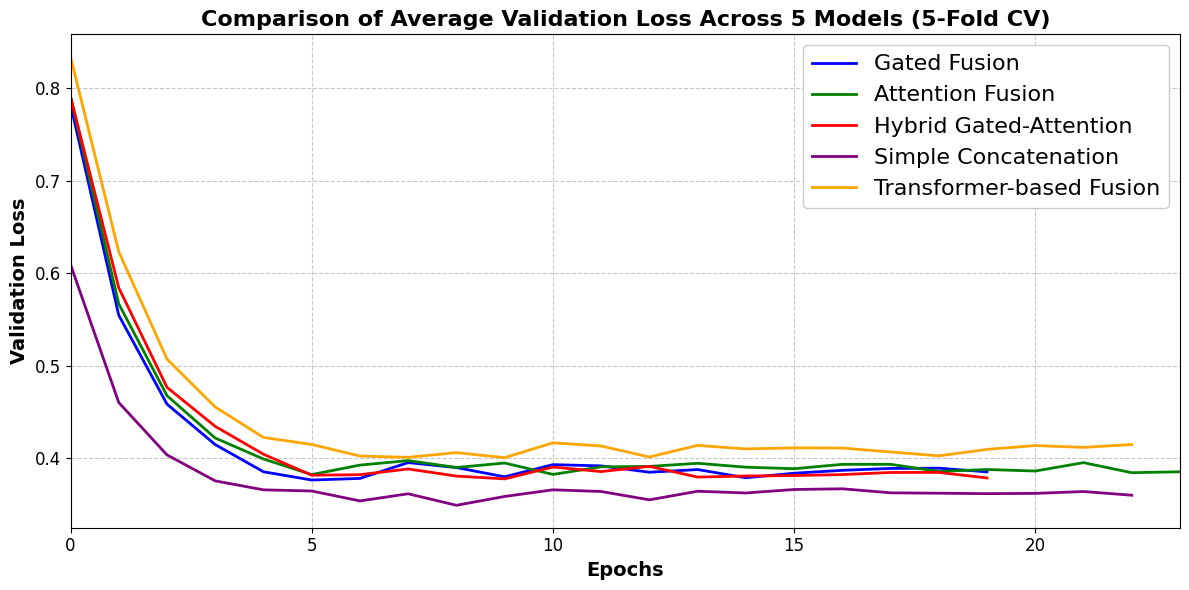

In [27]:
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, (model_name, metrics) in enumerate(all_models_metrics.items()):
    plt.plot(metrics["_step"], metrics["val_loss_mean"], 
             label=f"{model_name}", 
             color=colors[i],
             linewidth=2)

plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Validation Loss", fontsize=14, fontweight='bold')
plt.title("Comparison of Average Validation Loss Across 5 Models (5-Fold CV)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.legend(loc='upper right', fontsize=16, framealpha=1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 23)  # Limited to 23 epochs
plt.tight_layout()
plt.show()

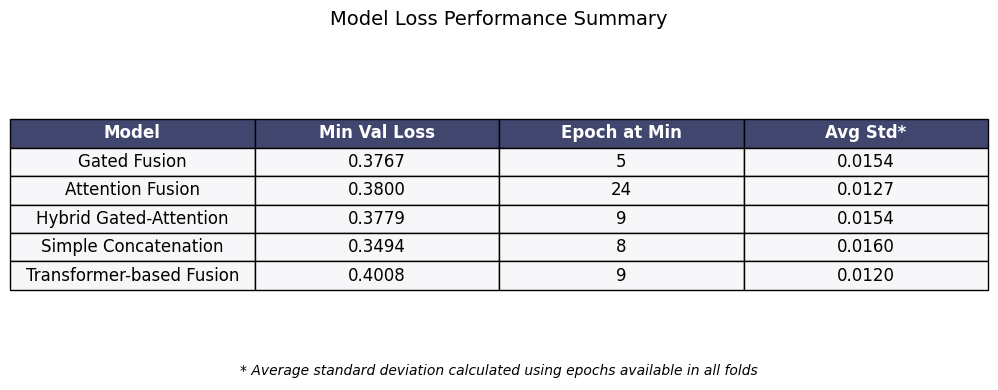

In [52]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Create the results DataFrame for loss metrics
results_loss = []
for model_name, metrics in all_models_metrics.items():
    valid_epochs = metrics.dropna(subset=['val_loss_std'])
    min_row = metrics.loc[metrics['val_loss_mean'].idxmin()]
    avg_std_loss = valid_epochs['val_loss_std'].mean()
    
    results_loss.append({
        'Model': model_name,
        'Min Val Loss': min_row['val_loss_mean'],
        'Epoch at Min': int(min_row['_step']),
        'Avg Std*': avg_std_loss
    })

results_loss_df = pd.DataFrame(results_loss)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# Create table
table = ax.table(
    cellText=results_loss_df.values,
    colLabels=results_loss_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f3f3f3']*len(results_loss_df.columns)
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Format numeric cells
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f7f7f9')
        if j == 1:  # Min Val Loss (4 decimal places)
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.4f}")
        elif j == 3:  # Avg Std* (4 decimal places)
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.4f}")
        elif j == 2:  # Epoch at Min (integer)
            cell.get_text().set_text(f"{int(float(cell.get_text().get_text()))}")

plt.title("Model Loss Performance Summary", pad=0, fontsize=14)

# Add footnote
footnote = "* Average standard deviation calculated using epochs available in all folds"
plt.figtext(0.5, 0.05, footnote, ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

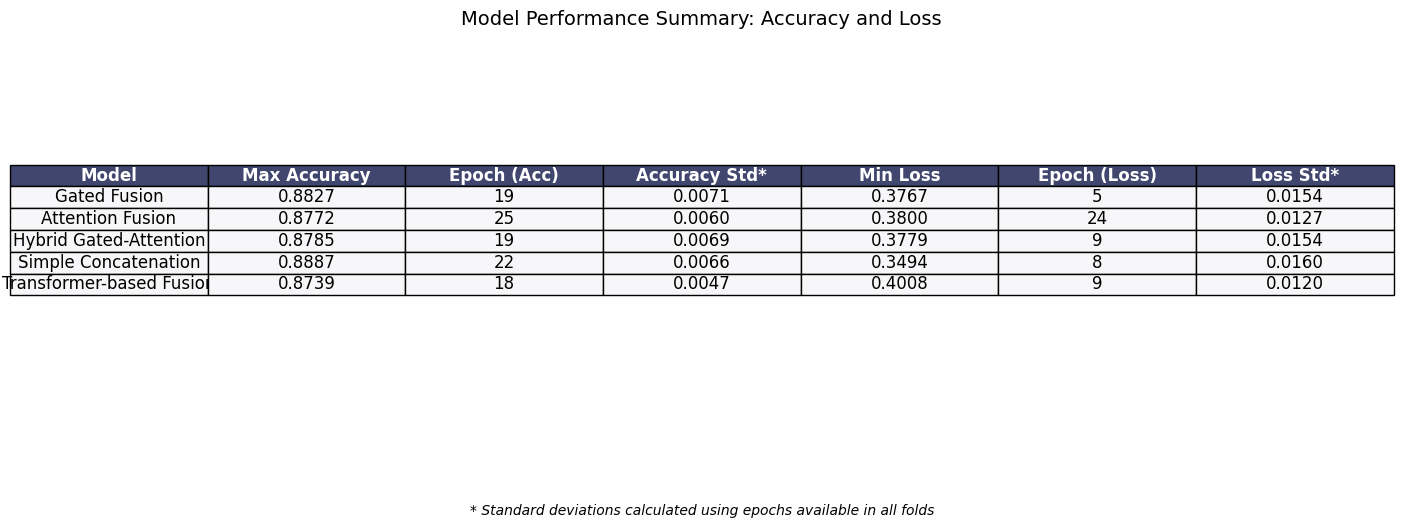

In [49]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Create combined results DataFrame
combined_results = []
for model_name, metrics in all_models_metrics.items():
    # Accuracy metrics
    valid_acc_epochs = metrics.dropna(subset=['val_accuracy_std'])
    max_row = metrics.loc[metrics['val_accuracy_mean'].idxmax()]
    avg_std_acc = valid_acc_epochs['val_accuracy_std'].mean()
    
    # Loss metrics
    valid_loss_epochs = metrics.dropna(subset=['val_loss_std'])
    min_row = metrics.loc[metrics['val_loss_mean'].idxmin()]
    avg_std_loss = valid_loss_epochs['val_loss_std'].mean()
    
    combined_results.append({
        'Model': model_name,
        'Max Accuracy': max_row['val_accuracy_mean'],
        'Epoch (Acc)': int(max_row['_step']),
        'Accuracy Std*': avg_std_acc,
        'Min Loss': min_row['val_loss_mean'],
        'Epoch (Loss)': int(min_row['_step']),
        'Loss Std*': avg_std_loss
    })

combined_df = pd.DataFrame(combined_results)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')

# Create table
table = ax.table(
    cellText=combined_df.values,
    colLabels=combined_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f3f3f3']*len(combined_df.columns)
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Format numeric cells and highlight headers
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f7f7f9')
        if j in [1, 3, 4, 6]:  # Format float columns
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.4f}")

# Add section headers
# plt.figtext(0.28, 0.93, "Accuracy Metrics", ha='center', fontsize=12, weight='bold')
# plt.figtext(0.67, 0.93, "Loss Metrics", ha='center', fontsize=12, weight='bold')

# Add footnote
footnote = "* Standard deviations calculated using epochs available in all folds"
plt.figtext(0.5, 0.01, footnote, ha='center', fontsize=10, style='italic')

plt.title("Model Performance Summary: Accuracy and Loss", pad=0, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, top=0.82)
plt.show()

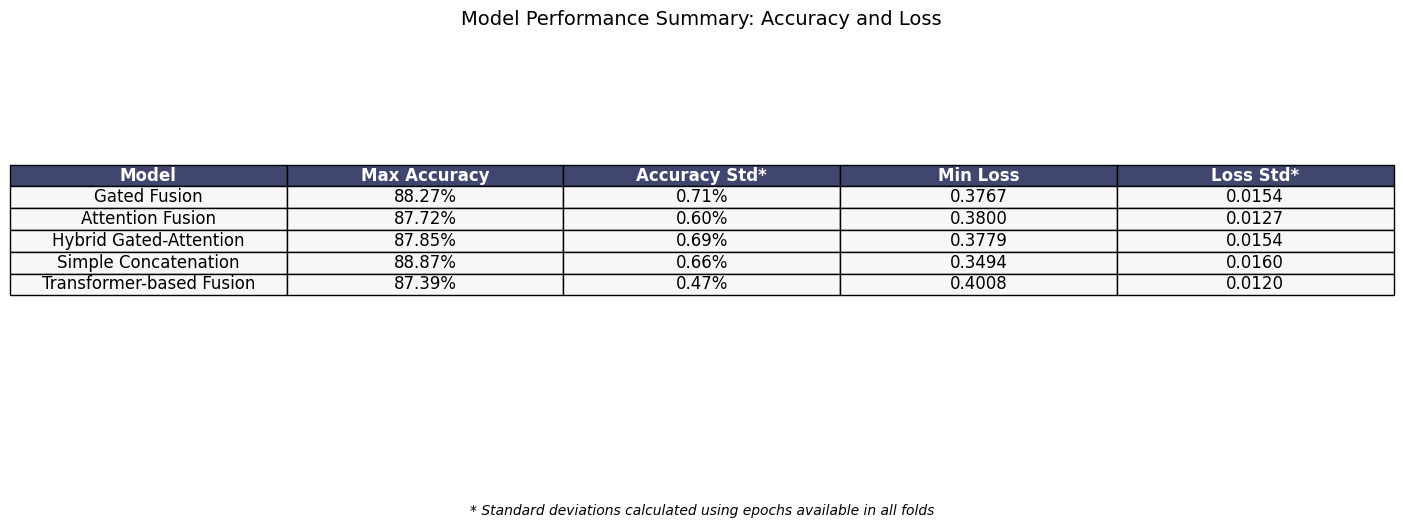

Model Performance Summary

Model                     Max Accuracy  Accuracy Std*   Min Loss  Loss Std*
---------------------------------------------------------------------------
Gated Fusion                    88.27%          0.71%     0.3767     0.0154
Attention Fusion                87.72%          0.60%     0.3800     0.0127
Hybrid Gated-Attention          87.85%          0.69%     0.3779     0.0154
Simple Concatenation            88.87%          0.66%     0.3494     0.0160
Transformer-based Fusion        87.39%          0.47%     0.4008     0.0120

* Standard deviations calculated using epochs available in all folds


In [57]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Create combined results DataFrame
combined_results = []
for model_name, metrics in all_models_metrics.items():
    # Accuracy metrics
    valid_acc_epochs = metrics.dropna(subset=['val_accuracy_std'])
    max_row = metrics.loc[metrics['val_accuracy_mean'].idxmax()]
    avg_std_acc = valid_acc_epochs['val_accuracy_std'].mean()
    
    # Loss metrics
    valid_loss_epochs = metrics.dropna(subset=['val_loss_std'])
    min_row = metrics.loc[metrics['val_loss_mean'].idxmin()]
    avg_std_loss = valid_loss_epochs['val_loss_std'].mean()
    
    combined_results.append({
        'Model': model_name,
        'Max Accuracy': max_row['val_accuracy_mean'] * 100,
        'Accuracy Std*': avg_std_acc * 100,
        'Min Loss': min_row['val_loss_mean'],
        'Loss Std*': avg_std_loss
    })

combined_df = pd.DataFrame(combined_results)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')

# Create table
table = ax.table(
    cellText=combined_df.values,
    colLabels=combined_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f3f3f3']*len(combined_df.columns)
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Format numeric cells and highlight headers
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f7f7f9')
        if j == 1:  # Max Accuracy (%)
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.2f}%")
        elif j == 2:  # Accuracy Std* (%)
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.2f}%")
        elif j in [3, 4]:  # Loss columns (4 decimal places)
            cell.get_text().set_text(f"{float(cell.get_text().get_text()):.4f}")

# Add footnote
footnote = "* Standard deviations calculated using epochs available in all folds"
plt.figtext(0.5, 0.01, footnote, ha='center', fontsize=10, style='italic')

plt.title("Model Performance Summary: Accuracy and Loss", pad=0, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, top=0.82)
plt.show()

# After creating combined_df, add this code to print the console version:

# Format the values in the DataFrame
formatted_df = combined_df.copy()
formatted_df['Max Accuracy'] = formatted_df['Max Accuracy'].apply(lambda x: f"{x:.2f}%")
formatted_df['Accuracy Std*'] = formatted_df['Accuracy Std*'].apply(lambda x: f"{x:.2f}%")
formatted_df['Min Loss'] = formatted_df['Min Loss'].apply(lambda x: f"{x:.4f}")
formatted_df['Loss Std*'] = formatted_df['Loss Std*'].apply(lambda x: f"{x:.4f}")

# Print the formatted table
print("Model Performance Summary\n")
print(f"{'Model':<25} {'Max Accuracy':>12} {'Accuracy Std*':>14} {'Min Loss':>10} {'Loss Std*':>10}")
print("-"*75)

for _, row in formatted_df.iterrows():
    print(f"{row['Model']:<25} {row['Max Accuracy']:>12} {row['Accuracy Std*']:>14} {row['Min Loss']:>10} {row['Loss Std*']:>10}")

print("\n* Standard deviations calculated using epochs available in all folds")